<a href="https://colab.research.google.com/github/kittikhun62/efficientnet_keras_transfer_learning/blob/master/2class_test_datanew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [2]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1067, done.
remote: Counting objects: 100% (230/230), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 1067 (delta 114), reused 161 (delta 79), pack-reused 837
Receiving objects: 100% (1067/1067), 13.93 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (611/611), done.
/content/efficientnet_keras_transfer_learning


In [3]:

df = pd.read_csv (r'/content/drive/My Drive/data - 2 class เพิ่ม 4 paper.csv')
df

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico),Class_01
0,1,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom1,0-800,135.06,10,0
1,2,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom2,0-800,135.06,10,0
2,3,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom3,0-800,135.06,10,0
3,4,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom4,0-800,135.06,10,0
4,5,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom5,0-800,135.06,10,0
...,...,...,...,...,...,...,...,...,...,...
825,826,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom21,0-800,301.70,10,0
826,827,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom22,0-800,301.70,10,0
827,828,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom23,0-800,301.70,10,0
828,829,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom24,0-800,301.70,10,0


In [4]:
import sys
sys.path.append('/content/drive/My Drive/new/2Class_datanew.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [5]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/new/2Class_datanew.h5')
height = width = model.input_shape[1]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
base_dir = '/content/drive/My Drive/new project'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [7]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, # image input 0-255 --> 0-1 เปลี่ยนค่าสี
      rotation_range=40,# หมุนภาพในองศา
      width_shift_range=0.2, #เปลี่ยนความกว้าง
      height_shift_range=0.2, #ปลี่ยนความสูง
      shear_range=0.2, #ทำให้ภาพเบี้ยว
      zoom_range=0.2, # Randomly zoom image
      horizontal_flip=True, 
      #โดย Default เมื่อมีการเลื่อนภาพ บิดภาพ หมุนภาพ จะเกิดพื้นที่ว่างที่มุม 
      #ซึ่งจะมีการเติมภาพให้เต็มโดยใช้เทคนิคแบบ Nearest neighbor ซึ่งเป็นการดึงสีบริเวณใหล้าเคียงมาระบายให้เต็ม แต่เราก็ยังสามารถกำหนดวิธีการ Fill ภาพด้วยเทคนิคอื่นได้จาก Parameter fill_mode
      fill_mode='nearest')
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( #การดึงภาพจาก Directory มาเข้าโมเดล 
        validation_dir,
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')
     

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 628 images belonging to 2 classes.
Found 101 images belonging to 2 classes.
{0: '0-800', 1: '801-3200'}


In [8]:

test = df[df['No'].between(730,830)] 
test

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico),Class_01
729,730,c9ra05225a,Study of the pore structure and size effects o...,ROYAL SOCIETY OF CHEMISTRY,/content/drive/My Drive/new train/c9ra05225a/m...,original,801-3200,1980.0,10,1
730,731,jp207232f,Pore Size Effect of Carbon Electrodes on the E...,"Renjie Chen, Zhouying He, Li Li, Feng Wu, Bin ...",/content/drive/My Drive/new train/jp207232f/ME...,zoom1,801-3200,1467.0,10,1
731,732,jp207232f,Pore Size Effect of Carbon Electrodes on the E...,"Renjie Chen, Zhouying He, Li Li, Feng Wu, Bin ...",/content/drive/My Drive/new train/jp207232f/ME...,zoom2,801-3200,1467.0,10,1
732,733,jp207232f,Pore Size Effect of Carbon Electrodes on the E...,"Renjie Chen, Zhouying He, Li Li, Feng Wu, Bin ...",/content/drive/My Drive/new train/jp207232f/ME...,zoom3,801-3200,1467.0,10,1
733,734,jp207232f,Pore Size Effect of Carbon Electrodes on the E...,"Renjie Chen, Zhouying He, Li Li, Feng Wu, Bin ...",/content/drive/My Drive/new train/jp207232f/ME...,zoom4,801-3200,1467.0,10,1
...,...,...,...,...,...,...,...,...,...,...
825,826,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom21,0-800,301.7,10,0
826,827,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom22,0-800,301.7,10,0
827,828,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom23,0-800,301.7,10,0
828,829,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom24,0-800,301.7,10,0


In [9]:

act = test['Class'].tolist()
path = test['path_Picture'].tolist()

In [10]:

from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน 
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [11]:
import numpy as np

In [12]:

no = np.argmax(predict_image(path[0]))
labels[no]

1/1 [==============================] - 2s 2s/step


'801-3200'

In [13]:
predict_image(path[1]) 

1/1 [==============================] - 0s 53ms/step


array([0.68969476, 0.3103052 ], dtype=float32)

In [14]:
np.argmax(predict_image(path[1]))

1/1 [==============================] - 0s 60ms/step


0

In [15]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

1/1 [==============================] - 0s 56ms/step


In [16]:
result

0

In [17]:
prob_list[0]

0.6722995

In [18]:
pred_list[0]

'801-3200'

In [19]:
pred = np.array(pred_list)
act = np.array(act)

In [20]:
act

array(['801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '0-800', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-800', '0-8

In [21]:
pred

array(['801-3200', '0-800', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '801-3200', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-800', '0-800', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '0-800',
       '801-3200', '801-3200', '801-3200', '801-3200', '801-3200',
       '801-3200', '801-3200', '801-3200', '0-800', '801-3200',
       '801-3200', '801-3200', '801-3200', '801-3200', '0-800',
       '801-3200', '801-3200', '801-3200', '801-3200', '0-800',
       '801-3200', '801-3200', '0-800', '0-800', '801-3200', '0-800',
       '0-800', '801-3200', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-800', '0-800', '801-3200', '0-800',
       '0-800', '0-800', '801-3200', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-800', '0-800', '0-800', '0-800',
       '0-800', '0-800', '0-800', '0-8

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 65.34653465346534%
              precision    recall  f1-score   support

       0-800       0.61      0.84      0.71        50
    801-3200       0.75      0.47      0.58        51

    accuracy                           0.65       101
   macro avg       0.68      0.66      0.64       101
weighted avg       0.68      0.65      0.64       101



Text(0.5, 21.5, 'Predicted label')

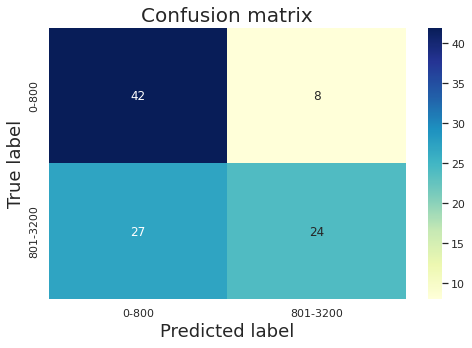

In [23]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)